# **DOUBLE MASK DETECTION**

**TEAM MEMBERS :**

1.VIJAY KUMAR.P - 19BCE7306

2.GUNTUPALLI TANUSH - 19BCE7297 (A SLOT)

3.NARRA NIVAS - 19BCE7635 (A SLOT)

4.G.SIVA NAGA SAI BABU - 19BCE7452 


In [1]:
from tensorflow.keras.optimizers import RMSprop
from keras.preprocessing.image import ImageDataGenerator
import cv2
from keras.models import Sequential
from keras.layers import Conv2D, Input, ZeroPadding2D, BatchNormalization, Activation, MaxPooling2D, Flatten, Dense,Dropout, AveragePooling2D
from keras.models import Model, load_model
from keras.callbacks import TensorBoard, ModelCheckpoint
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score
from sklearn.utils import shuffle
import imutils
import numpy as np
import keras
from keras.models import Sequential, Model
from keras.layers import Conv2D, MaxPooling2D, Input
from keras.layers import Dense, Dropout, Activation, Flatten
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras import datasets, layers, models, losses
from keras.utils.np_utils import to_categorical

In [2]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [3]:
from keras.preprocessing.image import ImageDataGenerator
train_datagen=ImageDataGenerator(rescale=1./255,shear_range=0.2,zoom_range=0.2,horizontal_flip=True)
x_train=train_datagen.flow_from_directory("/content/gdrive/MyDrive/dataset (1)/Train",target_size=(224,224),batch_size=32,class_mode="categorical")

Found 382 images belonging to 3 classes.


In [4]:
print(x_train.class_indices)

{'Double mask': 0, 'Single mask': 1, 'Without mask': 2}


In [5]:
test_datagen=ImageDataGenerator(rescale=1./255)
x_test=test_datagen.flow_from_directory("/content/gdrive/MyDrive/dataset (1)/Test",target_size=(224,224),batch_size=32,class_mode="categorical")

Found 140 images belonging to 3 classes.


# Alexnet Architecture

In [6]:
model = Sequential()

# 1st Convolutional Layer
model.add(Conv2D(filters = 96, input_shape = (224, 224, 3),
			kernel_size = (11, 11), strides = (4, 4),
			padding = 'valid'))
model.add(Activation('relu'))
# Max-Pooling
model.add(MaxPooling2D(pool_size = (2, 2),
			strides = (2, 2), padding = 'valid'))
# Batch Normalisation
model.add(BatchNormalization())

# 2nd Convolutional Layer
model.add(Conv2D(filters = 256, kernel_size = (11, 11),
			strides = (1, 1), padding = 'valid'))
model.add(Activation('relu'))
# Max-Pooling
model.add(MaxPooling2D(pool_size = (2, 2), strides = (2, 2),
			padding = 'valid'))
# Batch Normalisation
model.add(BatchNormalization())

# 3rd Convolutional Layer
model.add(Conv2D(filters = 384, kernel_size = (3, 3),
			strides = (1, 1), padding = 'valid'))
model.add(Activation('relu'))
# Batch Normalisation
model.add(BatchNormalization())

# 4th Convolutional Layer
model.add(Conv2D(filters = 384, kernel_size = (3, 3),
			strides = (1, 1), padding = 'valid'))
model.add(Activation('relu'))
# Batch Normalisation
model.add(BatchNormalization())

# 5th Convolutional Layer
model.add(Conv2D(filters = 256, kernel_size = (3, 3),
			strides = (1, 1), padding = 'valid'))
model.add(Activation('relu'))
# Max-Pooling
model.add(MaxPooling2D(pool_size = (2, 2), strides = (2, 2),
			padding = 'valid'))
# Batch Normalisation
model.add(BatchNormalization())

# Flattening
model.add(Flatten())

# 1st Dense Layer
model.add(Dense(4096, input_shape = (224*224*3, )))
model.add(Activation('relu'))
# Add Dropout to prevent overfitting
model.add(Dropout(0.4))
# Batch Normalisation
model.add(BatchNormalization())

# 2nd Dense Layer
model.add(Dense(4096))
model.add(Activation('relu'))
# Add Dropout
model.add(Dropout(0.4))
# Batch Normalisation
model.add(BatchNormalization())

# Output Softmax Layer
model.add(Dense(3))
model.add(Activation('softmax'))

model.compile(loss='categorical_crossentropy', 
	      optimizer='adam',
	      metrics=['acc'])


In [49]:
#steps per epoch=279/30;validation_step=120/30
history=model.fit_generator(x_train,epochs=50,validation_data=x_test)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  


Epoch 1/50
12/12 [==============================] - 7s 625ms/step - loss: 0.2609 - acc: 0.9005 - val_loss: 2.3991 - val_acc: 0.6214
Epoch 2/50
12/12 [==============================] - 7s 607ms/step - loss: 0.2785 - acc: 0.9188 - val_loss: 2.1074 - val_acc: 0.6786
Epoch 3/50
12/12 [==============================] - 7s 599ms/step - loss: 0.3224 - acc: 0.8927 - val_loss: 2.1487 - val_acc: 0.6429
Epoch 4/50
12/12 [==============================] - 7s 586ms/step - loss: 0.2468 - acc: 0.9110 - val_loss: 1.9733 - val_acc: 0.6571
Epoch 5/50
12/12 [==============================] - 7s 589ms/step - loss: 0.2702 - acc: 0.9084 - val_loss: 1.8796 - val_acc: 0.6357
Epoch 6/50
12/12 [==============================] - 7s 614ms/step - loss: 0.2637 - acc: 0.9084 - val_loss: 2.0739 - val_acc: 0.6143
Epoch 7/50
12/12 [==============================] - 7s 596ms/step - loss: 0.2043 - acc: 0.9162 - val_loss: 2.2391 - val_acc: 0.6286
Epoch 8/50
12/12 [==============================] - 7s 606ms/step - loss: 0.

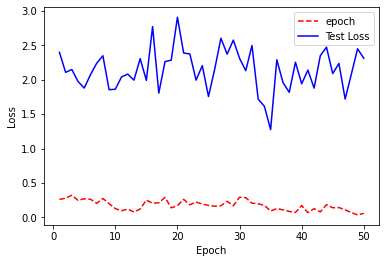

In [54]:
training_loss = history.history['loss']
test_loss = history.history['val_loss']

# Create count of the number of epochs
epoch_count = range(1, len(training_loss) + 1)

# Visualize loss history
plt.plot(epoch_count, training_loss, 'r--')
plt.plot(epoch_count, test_loss, 'b-')
plt.legend(['epoch', 'Test Loss'])
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show();

In [8]:
# Making predictions using our trained model
predictions = model.predict(x_test)
predictions = np.argmax(predictions, axis=1)

In [ ]:
# from sklearn.metrics import classification_report
# print(classification_report(yte, predictions))

In [9]:
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

from sklearn.metrics import confusion_matrix
y_true = [0, 0, 2, 2, 0, 1]
y_pred = [0, 0, 2, 2, 0, 2]
target_names = ['DoubleMask', 'Single_Mask', 'No_mask']
print(classification_report(y_true, y_pred, target_names=target_names, digits=4))

              precision    recall  f1-score   support

  DoubleMask     1.0000    1.0000    1.0000         3
 Single_Mask     0.0000    0.0000    0.0000         1
     No_mask     0.6667    1.0000    0.8000         2

    accuracy                         0.8333         6
   macro avg     0.5556    0.6667    0.6000         6
weighted avg     0.7222    0.8333    0.7667         6



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# Lenet Architecture

In [10]:
model2 = Sequential()
model2.add(layers.Conv2D(6, kernel_size=(5, 5), activation='relu', input_shape=(224, 224, 3)))
model2.add(layers.MaxPooling2D(pool_size=(2, 2)))
model2.add(layers.Conv2D(16, kernel_size=(5, 5), activation='relu'))
model2.add(layers.MaxPooling2D(pool_size=(2, 2)))
model2.add(Flatten())
model2.add(layers.Dense(120, activation='relu'))
model2.add(layers.Dense(84, activation='relu'))
model2.add(layers.Dense(3, activation='softmax'))

In [11]:
model2.compile(loss='categorical_crossentropy', 
	      optimizer='adam',
	      metrics=['acc'])

In [12]:
#steps per epoch=279/30;validation_step=120/30
model2.fit_generator(x_train,epochs=50,validation_data=x_test)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  


Epoch 1/50
12/12 [==============================] - 13s 741ms/step - loss: 1.5709 - acc: 0.4450 - val_loss: 1.0111 - val_acc: 0.4000
Epoch 2/50
12/12 [==============================] - 7s 580ms/step - loss: 0.9991 - acc: 0.4398 - val_loss: 0.9352 - val_acc: 0.5000
Epoch 3/50
12/12 [==============================] - 7s 602ms/step - loss: 0.8693 - acc: 0.5524 - val_loss: 0.8366 - val_acc: 0.5929
Epoch 4/50
12/12 [==============================] - 7s 614ms/step - loss: 0.7533 - acc: 0.6283 - val_loss: 0.7694 - val_acc: 0.6571
Epoch 5/50
12/12 [==============================] - 7s 618ms/step - loss: 0.6989 - acc: 0.7068 - val_loss: 0.7989 - val_acc: 0.6500
Epoch 6/50
12/12 [==============================] - 7s 616ms/step - loss: 0.6801 - acc: 0.7094 - val_loss: 0.7672 - val_acc: 0.6929
Epoch 7/50
12/12 [==============================] - 7s 613ms/step - loss: 0.6093 - acc: 0.7539 - val_loss: 0.7744 - val_acc: 0.6929
Epoch 8/50
12/12 [==============================] - 7s 610ms/step - loss: 0

# **Lenet_1**

In [14]:
model21 = Sequential()
model21.add(layers.Conv2D(3, kernel_size=(4, 4), activation='sigmoid', input_shape=(224, 224, 3)))
model21.add(layers.MaxPooling2D(pool_size=(2, 2)))
model21.add(layers.Conv2D(32, kernel_size=(3, 3), activation='sigmoid'))
model21.add(layers.MaxPooling2D(pool_size=(2, 2)))
model21.add(Flatten())
model21.add(layers.Dense(120, activation='relu'))
model21.add(layers.Dense(84, activation='relu'))
model21.add(layers.Dense(3, activation='softmax'))

In [16]:
model21.compile(loss='categorical_crossentropy', 
	      optimizer='adagrad',
	      metrics=['acc'])

In [18]:
model21.fit_generator(x_train,epochs=50,validation_data=x_test)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  """Entry point for launching an IPython kernel.


Epoch 1/50
12/12 [==============================] - 8s 625ms/step - loss: 1.0750 - acc: 0.4555 - val_loss: 1.0229 - val_acc: 0.5000
Epoch 2/50
12/12 [==============================] - 7s 578ms/step - loss: 1.0406 - acc: 0.4817 - val_loss: 1.0226 - val_acc: 0.5000
Epoch 3/50
12/12 [==============================] - 7s 585ms/step - loss: 1.0452 - acc: 0.4660 - val_loss: 1.0242 - val_acc: 0.5000
Epoch 4/50
12/12 [==============================] - 7s 581ms/step - loss: 1.0450 - acc: 0.4817 - val_loss: 1.0211 - val_acc: 0.5000
Epoch 5/50
12/12 [==============================] - 7s 606ms/step - loss: 1.0390 - acc: 0.4817 - val_loss: 1.0210 - val_acc: 0.5000
Epoch 6/50
12/12 [==============================] - 7s 585ms/step - loss: 1.0564 - acc: 0.4634 - val_loss: 1.0200 - val_acc: 0.5000
Epoch 7/50
12/12 [==============================] - 7s 572ms/step - loss: 1.0362 - acc: 0.4817 - val_loss: 1.0190 - val_acc: 0.5000
Epoch 8/50
12/12 [==============================] - 7s 579ms/step - loss: 1.

# **Lenet_2**

In [20]:
model22 = Sequential()
model22.add(layers.Conv2D(10, kernel_size=(6, 6), activation='tanh', input_shape=(224, 224, 3)))
model22.add(layers.MaxPooling2D(pool_size=(2, 2)))
model22.add(layers.Conv2D(64, kernel_size=(3, 3), activation='tanh'))
model22.add(layers.MaxPooling2D(pool_size=(2, 2)))
model22.add(Flatten())
model22.add(layers.Dense(180, activation='relu'))
model22.add(layers.Dense(84, activation='relu'))
model22.add(layers.Dense(3, activation='sigmoid'))

In [21]:
model22.compile(loss='categorical_crossentropy', 
	      optimizer='RmsProp',
	      metrics=['acc'])

In [22]:
model22.fit_generator(x_train,epochs=50,validation_data=x_test)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  """Entry point for launching an IPython kernel.


Epoch 1/50
12/12 [==============================] - 9s 614ms/step - loss: 26.9295 - acc: 0.2932 - val_loss: 1.5866 - val_acc: 0.4643
Epoch 2/50
12/12 [==============================] - 7s 613ms/step - loss: 1.1441 - acc: 0.5707 - val_loss: 2.0883 - val_acc: 0.5357
Epoch 3/50
12/12 [==============================] - 8s 646ms/step - loss: 6.6391 - acc: 0.4084 - val_loss: 1.8461 - val_acc: 0.5929
Epoch 4/50
12/12 [==============================] - 7s 619ms/step - loss: 1.5291 - acc: 0.5419 - val_loss: 0.8512 - val_acc: 0.5643
Epoch 5/50
12/12 [==============================] - 7s 630ms/step - loss: 0.7349 - acc: 0.6623 - val_loss: 1.0146 - val_acc: 0.6571
Epoch 6/50
12/12 [==============================] - 7s 591ms/step - loss: 1.1018 - acc: 0.6230 - val_loss: 10.0040 - val_acc: 0.5000
Epoch 7/50
12/12 [==============================] - 7s 593ms/step - loss: 12.5551 - acc: 0.4136 - val_loss: 16.4875 - val_acc: 0.5429
Epoch 8/50
12/12 [==============================] - 7s 596ms/step - loss

# **Lenet_3**

In [24]:
model23 = Sequential()
model23.add(layers.Conv2D(32, kernel_size=(8, 8), activation='tanh', input_shape=(224, 224, 3)))
model23.add(layers.MaxPooling2D(pool_size=(2, 2)))
model23.add(layers.Conv2D(120, kernel_size=(8, 8), activation='tanh'))
model23.add(layers.MaxPooling2D(pool_size=(2, 2)))
model23.add(Flatten())
model23.add(layers.Dense(240, activation='sigmoid'))
model23.add(layers.Dense(84, activation='sigmoid'))
model23.add(layers.Dense(3, activation='softmax'))

In [25]:
model23.compile(loss='categorical_crossentropy', 
	      optimizer='Adadelta',
	      metrics=['acc'])

here we used optimizer as adadelta.And we observed that from the starting to ending all the epochs recorded with same accuracy.

In [26]:
model23.fit_generator(x_train,epochs=50,validation_data=x_test)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  """Entry point for launching an IPython kernel.


Epoch 1/50
12/12 [==============================] - 11s 751ms/step - loss: 1.0515 - acc: 0.4817 - val_loss: 1.0400 - val_acc: 0.5000
Epoch 2/50
12/12 [==============================] - 8s 636ms/step - loss: 1.0452 - acc: 0.4817 - val_loss: 1.0334 - val_acc: 0.5000
Epoch 3/50
12/12 [==============================] - 8s 644ms/step - loss: 1.0397 - acc: 0.4817 - val_loss: 1.0282 - val_acc: 0.5000
Epoch 4/50
12/12 [==============================] - 7s 629ms/step - loss: 1.0351 - acc: 0.4817 - val_loss: 1.0240 - val_acc: 0.5000
Epoch 5/50
12/12 [==============================] - 7s 622ms/step - loss: 1.0328 - acc: 0.4817 - val_loss: 1.0207 - val_acc: 0.5000
Epoch 6/50
12/12 [==============================] - 8s 652ms/step - loss: 1.0297 - acc: 0.4817 - val_loss: 1.0181 - val_acc: 0.5000
Epoch 7/50
12/12 [==============================] - 8s 646ms/step - loss: 1.0279 - acc: 0.4817 - val_loss: 1.0159 - val_acc: 0.5000
Epoch 8/50
12/12 [==============================] - 8s 641ms/step - loss: 1

# **Lenet_4**

In [32]:
model24 = Sequential()
model24.add(layers.Conv2D(12, kernel_size=(8, 8), activation='softmax', input_shape=(224, 224, 3)))
model24.add(layers.MaxPooling2D(pool_size=(2, 2)))
model24.add(layers.Conv2D(16, kernel_size=(5, 5), activation='tanh'))
model24.add(layers.MaxPooling2D(pool_size=(2, 2)))
model24.add(Flatten())
model24.add(layers.Dense(140, activation='relu'))
model24.add(layers.Dense(64, activation='tanh'))
model24.add(layers.Dense(3, activation='softmax'))

In [33]:
model24.compile(loss='categorical_crossentropy', 
	      optimizer='RmsProp',
	      metrics=['acc'])

In [34]:
model23.fit_generator(x_train,epochs=50,validation_data=x_test)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  """Entry point for launching an IPython kernel.


Epoch 1/50
12/12 [==============================] - 7s 620ms/step - loss: 0.9727 - acc: 0.4817 - val_loss: 0.9619 - val_acc: 0.5000
Epoch 2/50
12/12 [==============================] - 8s 636ms/step - loss: 0.9727 - acc: 0.4817 - val_loss: 0.9608 - val_acc: 0.5000
Epoch 3/50
12/12 [==============================] - 8s 653ms/step - loss: 0.9732 - acc: 0.4817 - val_loss: 0.9599 - val_acc: 0.5000
Epoch 4/50
12/12 [==============================] - 8s 638ms/step - loss: 0.9695 - acc: 0.4817 - val_loss: 0.9590 - val_acc: 0.5000
Epoch 5/50
12/12 [==============================] - 8s 632ms/step - loss: 0.9704 - acc: 0.4817 - val_loss: 0.9580 - val_acc: 0.5000
Epoch 6/50
12/12 [==============================] - 8s 633ms/step - loss: 0.9673 - acc: 0.4817 - val_loss: 0.9569 - val_acc: 0.5000
Epoch 7/50
12/12 [==============================] - 7s 617ms/step - loss: 0.9657 - acc: 0.4817 - val_loss: 0.9559 - val_acc: 0.5000
Epoch 8/50
12/12 [==============================] - 8s 640ms/step - loss: 0.

# **Lenet_5**

In [35]:
model25 = Sequential()
model25.add(layers.Conv2D(20, kernel_size=(18, 18), activation='softmax', input_shape=(224, 224, 3)))
model25.add(layers.MaxPooling2D(pool_size=(2, 2)))
model25.add(layers.Conv2D(32, kernel_size=(5, 5), activation='relu'))
model25.add(layers.MaxPooling2D(pool_size=(2, 2)))
model25.add(Flatten())
model25.add(layers.Dense(220, activation='relu'))
model25.add(layers.Dense(124, activation='relu'))
model25.add(layers.Dense(3, activation='softmax'))

In [36]:
model25.compile(loss='categorical_crossentropy', 
	      optimizer='adam',
	      metrics=['acc'])

In [38]:
model25.fit_generator(x_train,epochs=50,validation_data=x_test)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  """Entry point for launching an IPython kernel.


Epoch 1/50
12/12 [==============================] - 10s 659ms/step - loss: 1.4751 - acc: 0.4476 - val_loss: 0.9593 - val_acc: 0.5429
Epoch 2/50
12/12 [==============================] - 7s 599ms/step - loss: 1.0253 - acc: 0.4948 - val_loss: 1.1110 - val_acc: 0.3714
Epoch 3/50
12/12 [==============================] - 7s 615ms/step - loss: 0.9876 - acc: 0.5026 - val_loss: 0.9033 - val_acc: 0.6429
Epoch 4/50
12/12 [==============================] - 7s 612ms/step - loss: 0.9039 - acc: 0.5995 - val_loss: 0.8824 - val_acc: 0.6214
Epoch 5/50
12/12 [==============================] - 7s 625ms/step - loss: 0.8738 - acc: 0.6126 - val_loss: 0.8095 - val_acc: 0.6429
Epoch 6/50
12/12 [==============================] - 7s 614ms/step - loss: 0.8435 - acc: 0.6047 - val_loss: 0.8464 - val_acc: 0.6286
Epoch 7/50
12/12 [==============================] - 7s 610ms/step - loss: 0.7837 - acc: 0.6518 - val_loss: 0.7794 - val_acc: 0.6500
Epoch 8/50
12/12 [==============================] - 7s 597ms/step - loss: 0

**Making Predictions**

In [ ]:
# Making predictions using our trained model
predictions2 = model2.predict(x_test)
predictions2 = np.argmax(predictions2, axis=1)

# VGGNet Architecture

In [39]:
model3 = Sequential()
model3.add(Conv2D(input_shape=(224,224,3),filters=64,kernel_size=(3,3),padding="same", activation="relu"))
model3.add(Conv2D(filters=64,kernel_size=(3,3),padding="same", activation="relu"))
model3.add(MaxPooling2D(pool_size=(2,2),strides=(2,2)))
model3.add(Conv2D(filters=128, kernel_size=(3,3), padding="same", activation="relu"))
model3.add(Conv2D(filters=128, kernel_size=(3,3), padding="same", activation="relu"))
model3.add(MaxPooling2D(pool_size=(2,2),strides=(2,2)))
model3.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
model3.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
model3.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
model3.add(MaxPooling2D(pool_size=(2,2),strides=(2,2)))
model3.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model3.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model3.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model3.add(MaxPooling2D(pool_size=(2,2),strides=(2,2)))
model3.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model3.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model3.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model3.add(MaxPooling2D(pool_size=(2,2),strides=(2,2)))

model3.add(Flatten())
model3.add(Dense(units=4096,activation="relu"))
model3.add(Dense(units=4096,activation="relu"))
model3.add(Dense(units=3, activation="softmax"))

In [40]:
model3.compile(loss='categorical_crossentropy', 
	      optimizer='adam',
	      metrics=['acc'])

In [41]:
#steps per epoch=279/30;validation_step=120/30
model3.fit_generator(x_train,epochs=50,validation_data=x_test)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  


Epoch 1/50
12/12 [==============================] - 23s 1s/step - loss: 1.2929 - acc: 0.4607 - val_loss: 1.0839 - val_acc: 0.5000
Epoch 2/50
12/12 [==============================] - 9s 763ms/step - loss: 1.0758 - acc: 0.4817 - val_loss: 1.0307 - val_acc: 0.5000
Epoch 3/50
12/12 [==============================] - 9s 733ms/step - loss: 1.0398 - acc: 0.4817 - val_loss: 1.0211 - val_acc: 0.5000
Epoch 4/50
12/12 [==============================] - 9s 751ms/step - loss: 1.0388 - acc: 0.4817 - val_loss: 1.0222 - val_acc: 0.5000
Epoch 5/50
12/12 [==============================] - 9s 776ms/step - loss: 1.0333 - acc: 0.4817 - val_loss: 1.0190 - val_acc: 0.5000
Epoch 6/50
12/12 [==============================] - 9s 774ms/step - loss: 1.0352 - acc: 0.4817 - val_loss: 1.0236 - val_acc: 0.5000
Epoch 7/50
12/12 [==============================] - 9s 747ms/step - loss: 1.0414 - acc: 0.4817 - val_loss: 1.0287 - val_acc: 0.5000
Epoch 8/50
12/12 [==============================] - 9s 746ms/step - loss: 1.03

**Making Predictions**

In [42]:
# Making predictions using our trained model
predictions2 = model2.predict(x_test)
predictions2 = np.argmax(predictions2, axis=1)

# Xception

In [ ]:
import tensorflow as tf
from tensorflow.keras.layers import Input,Dense,Conv2D,Add
from tensorflow.keras.layers import SeparableConv2D,ReLU
from tensorflow.keras.layers import BatchNormalization,MaxPool2D
from tensorflow.keras.layers import GlobalAvgPool2D
from tensorflow.keras import Model
# creating the Conv-Batch Norm block

def conv_bn(x, filters, kernel_size, strides=1):
    
    x = Conv2D(filters=filters, 
               kernel_size = kernel_size, 
               strides=strides, 
               padding = 'same', 
               use_bias = False)(x)
    x = BatchNormalization()(x)
    return x
# creating separableConv-Batch Norm block

def sep_bn(x, filters, kernel_size, strides=1):
    
    x = SeparableConv2D(filters=filters, 
                        kernel_size = kernel_size, 
                        strides=strides, 
                        padding = 'same', 
                        use_bias = False)(x)
    x = BatchNormalization()(x)
    return x
# entry flow

def entry_flow(x):
    
    x = conv_bn(x, filters =32, kernel_size =3, strides=2)
    x = ReLU()(x)
    x = conv_bn(x, filters =64, kernel_size =3, strides=1)
    tensor = ReLU()(x)
    
    x = sep_bn(tensor, filters = 128, kernel_size =3)
    x = ReLU()(x)
    x = sep_bn(x, filters = 128, kernel_size =3)
    x = MaxPool2D(pool_size=3, strides=2, padding = 'same')(x)
    
    tensor = conv_bn(tensor, filters=128, kernel_size = 1,strides=2)
    x = Add()([tensor,x])
    
    x = ReLU()(x)
    x = sep_bn(x, filters =256, kernel_size=3)
    x = ReLU()(x)
    x = sep_bn(x, filters =256, kernel_size=3)
    x = MaxPool2D(pool_size=3, strides=2, padding = 'same')(x)
    
    tensor = conv_bn(tensor, filters=256, kernel_size = 1,strides=2)
    x = Add()([tensor,x])
    
    x = ReLU()(x)
    x = sep_bn(x, filters =728, kernel_size=3)
    x = ReLU()(x)
    x = sep_bn(x, filters =728, kernel_size=3)
    x = MaxPool2D(pool_size=3, strides=2, padding = 'same')(x)
    
    tensor = conv_bn(tensor, filters=728, kernel_size = 1,strides=2)
    x = Add()([tensor,x])
    return x
# middle flow

def middle_flow(tensor):
    
    for _ in range(8):
        x = ReLU()(tensor)
        x = sep_bn(x, filters = 728, kernel_size = 3)
        x = ReLU()(x)
        x = sep_bn(x, filters = 728, kernel_size = 3)
        x = ReLU()(x)
        x = sep_bn(x, filters = 728, kernel_size = 3)
        x = ReLU()(x)
        tensor = Add()([tensor,x])
        
    return tensor
# exit flow

def exit_flow(tensor):
    
    x = ReLU()(tensor)
    x = sep_bn(x, filters = 728,  kernel_size=3)
    x = ReLU()(x)
    x = sep_bn(x, filters = 1024,  kernel_size=3)
    x = MaxPool2D(pool_size = 3, strides = 2, padding ='same')(x)
    
    tensor = conv_bn(tensor, filters =1024, kernel_size=1, strides =2)
    x = Add()([tensor,x])
    
    x = sep_bn(x, filters = 1536,  kernel_size=3)
    x = ReLU()(x)
    x = sep_bn(x, filters = 2048,  kernel_size=3)
    x = GlobalAvgPool2D()(x)
    
    x = Dense (units = 3, activation = 'softmax')(x)
    
    return x
# model code

input = Input(shape = (224,224,3))
x = entry_flow(input)
x = middle_flow(x)
output = exit_flow(x)

model4 = Model (inputs=input, outputs=output)
model4.summary()

In [44]:
model4.compile(loss='categorical_crossentropy', 
	      optimizer='adam',
	      metrics=['acc'])

In [45]:
#steps per epoch=279/30;validation_step=120/30
model4.fit_generator(x_train,epochs=50,validation_data=x_test)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  


Epoch 1/50
12/12 [==============================] - 22s 1s/step - loss: 1.9444 - acc: 0.4712 - val_loss: 1.0393 - val_acc: 0.5000
Epoch 2/50
12/12 [==============================] - 10s 787ms/step - loss: 0.8974 - acc: 0.6073 - val_loss: 1.0257 - val_acc: 0.5000
Epoch 3/50
12/12 [==============================] - 10s 793ms/step - loss: 0.7050 - acc: 0.7042 - val_loss: 1.0227 - val_acc: 0.5000
Epoch 4/50
12/12 [==============================] - 12s 975ms/step - loss: 0.5548 - acc: 0.7906 - val_loss: 1.0265 - val_acc: 0.5000
Epoch 5/50
12/12 [==============================] - 10s 797ms/step - loss: 0.4836 - acc: 0.7958 - val_loss: 1.0328 - val_acc: 0.5000
Epoch 6/50
12/12 [==============================] - 10s 840ms/step - loss: 0.5384 - acc: 0.7723 - val_loss: 1.0357 - val_acc: 0.5000
Epoch 7/50
12/12 [==============================] - 10s 817ms/step - loss: 0.4782 - acc: 0.8194 - val_loss: 1.0389 - val_acc: 0.5000
Epoch 8/50
12/12 [==============================] - 10s 838ms/step - los

#ResNet50

In [ ]:
import tensorflow.keras as K
import tensorflow as tf
input_t = K.Input(shape=(224, 224, 3))
res_model5 = K.applications.ResNet50(include_top=False,
                                    weights="imagenet",
                                    input_tensor=input_t)

for layer in res_model5.layers[:143]:
    layer.trainable = False

for i, layer in enumerate(res_model5.layers):
    print(i, layer.name, "-", layer.trainable)

to_res = (224, 224)
model5 = K.models.Sequential()
model5.add(K.layers.Lambda(lambda image: tf.image.resize(image, to_res))) 
model5.add(res_model5)
model5.add(K.layers.Flatten())
model5.add(K.layers.BatchNormalization())
model5.add(K.layers.Dense(256, activation='relu'))
model5.add(K.layers.Dropout(0.5))
model5.add(K.layers.BatchNormalization())
model5.add(K.layers.Dense(128, activation='relu'))
model5.add(K.layers.Dropout(0.5))
model5.add(K.layers.BatchNormalization())
model5.add(K.layers.Dense(64, activation='relu'))
model5.add(K.layers.Dropout(0.5))
model5.add(K.layers.BatchNormalization())
model5.add(K.layers.Dense(3, activation='softmax'))

model5.compile(loss='categorical_crossentropy',
              optimizer=K.optimizers.RMSprop(lr=2e-5),
              metrics=['accuracy'])

In [47]:
#steps per epoch=279/30;validation_step=120/30
model5.fit_generator(x_train,epochs=100,validation_data=x_test)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  


Epoch 1/100
12/12 [==============================] - 17s 804ms/step - loss: 1.5753 - accuracy: 0.3298 - val_loss: 1.1215 - val_accuracy: 0.4714
Epoch 2/100
12/12 [==============================] - 8s 633ms/step - loss: 1.5576 - accuracy: 0.3403 - val_loss: 1.1459 - val_accuracy: 0.3643
Epoch 3/100
12/12 [==============================] - 8s 669ms/step - loss: 1.5145 - accuracy: 0.3508 - val_loss: 1.1469 - val_accuracy: 0.4571
Epoch 4/100
12/12 [==============================] - 8s 635ms/step - loss: 1.4448 - accuracy: 0.4084 - val_loss: 1.1234 - val_accuracy: 0.5000
Epoch 5/100
12/12 [==============================] - 8s 642ms/step - loss: 1.4955 - accuracy: 0.3927 - val_loss: 1.1418 - val_accuracy: 0.4929
Epoch 6/100
12/12 [==============================] - 8s 676ms/step - loss: 1.4559 - accuracy: 0.3927 - val_loss: 1.1188 - val_accuracy: 0.5286
Epoch 7/100
12/12 [==============================] - 8s 638ms/step - loss: 1.4069 - accuracy: 0.4031 - val_loss: 1.1316 - val_accuracy: 0.521